<a href="https://colab.research.google.com/github/apchavezr/19.-Procesamiento-del-Lenguaje-Natural/blob/main/Evaluacion_Metricas_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejemplo 4. evaluación de modelos con métricas estándar (PLN)

**Objetivo:** calcular e interpretar **precisión (precision)**, **recall**, **F1-score** y la **matriz de confusión** en un problema de clasificación binaria de reseñas (positiva/negativa).  
Este notebook usa un *dataset* simulado y está pensado para practicar la **interpretación** de las métricas más allá del *accuracy*.



## 1. contexto y dataset simulado

Se simulan 12 reseñas de productos con sus **etiquetas reales** y las **predicciones** de un modelo.  
El propósito es aprender a interpretar las métricas, no entrenar el clasificador.


In [1]:

# etiquetas reales y predicciones del modelo
y_true = ["positiva","positiva","negativa","positiva","negativa","negativa",
          "positiva","negativa","positiva","negativa","positiva","negativa"]

y_pred = ["positiva","negativa","negativa","positiva","positiva","negativa",
          "positiva","negativa","positiva","negativa","negativa","negativa"]

len(y_true), len(y_pred)  # verificación de tamaños


(12, 12)


## 2. cálculo de métricas (precision, recall, F1) y matriz de confusión

Por defecto, se evalúa la clase **positiva** como clase de interés (`pos_label="positiva"`).  
Luego, en los ejercicios, podrá cambiar esta referencia o agregar una clase *neutra*.


In [2]:

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

pos_label = "positiva"

precision = precision_score(y_true, y_pred, pos_label=pos_label)
recall = recall_score(y_true, y_pred, pos_label=pos_label)
f1 = f1_score(y_true, y_pred, pos_label=pos_label)

print(f"Precisión ({pos_label=}):", round(precision, 2))
print(f"Recall    ({pos_label=}):", round(recall, 2))
print(f"F1-score  ({pos_label=}):", round(f1, 2))

# matriz de confusión (orden explícito de etiquetas)
labels = ["positiva","negativa"]
cm = confusion_matrix(y_true, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=[f"real_{l}" for l in labels], columns=[f"pred_{l}" for l in labels])
print("\nMatriz de confusión:")
print(df_cm)

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=labels))


Precisión (pos_label='positiva'): 0.8
Recall    (pos_label='positiva'): 0.67
F1-score  (pos_label='positiva'): 0.73

Matriz de confusión:
               pred_positiva  pred_negativa
real_positiva              4              2
real_negativa              1              5

Reporte de clasificación:
              precision    recall  f1-score   support

    positiva       0.71      0.83      0.77         6
    negativa       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12




## 3. visualización de la matriz de confusión

Se grafica la matriz para identificar de forma visual **verdaderos** y **falsos** positivos/negativos.  
> Nota: no se define un esquema de color específico (uso por defecto de matplotlib).


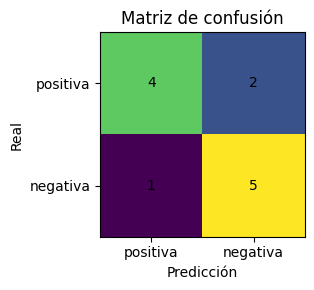

In [20]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,3))
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de confusión")
plt.xticks([0,1], ["positiva","negativa"])
plt.yticks([0,1], ["positiva","negativa"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



## 4. función para experimentar con otra clase positiva o nuevos datos

Use `evaluar(y_true, y_pred, pos_label)` para recalcular métricas y la matriz de confusión con otros arreglos o cambiando la clase positiva.


In [19]:

def evaluar(y_true, y_pred, pos_label="positive"):
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
    import pandas as pd
    import matplotlib.pyplot as plt

    precision = precision_score(y_true, y_pred, pos_label=pos_label, zero_division=0)
    recall = recall_score(y_true, y_pred, pos_label=pos_label, zero_division=0)
    f1 = f1_score(y_true, y_pred, pos_label=pos_label, zero_division=0)

    print(f"=== Evaluación (pos_label='{pos_label}') ===")
    print("Precisión:", round(precision, 3))
    print("Recall   :", round(recall, 3))
    print("F1-score :", round(f1, 3))

    etiquetas = sorted(list(set(y_true) | set(y_pred)))
    cm = confusion_matrix(y_true, y_pred, labels=etiquetas)
    print("\nMatriz de confusión (orden dinámico de etiquetas):")
    print(pd.DataFrame(cm, index=[f"real_{l}" for l in etiquetas], columns=[f"pred_{l}" for l in etiquetas]))

    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Visualización
    fig = plt.figure(figsize=(4,3))
    plt.imshow(cm, interpolation='nearest')
    plt.title("Matriz de confusión")
    plt.xticks(range(len(etiquetas)), etiquetas)
    plt.yticks(range(len(etiquetas)), etiquetas)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# ejemplo de uso:
# evaluar(y_true, y_pred, pos_label="negativa")



## 5. ejercicios guiados

1. **Cambie la clase positiva de interés:** ejecute `evaluar(y_true, y_pred, pos_label="negativa")` y compare con la salida por defecto.
2. **Agregue clase *neutra*:** defina nuevos arreglos con etiquetas `["positiva","negativa","neutra"]` (tanto en *y_true* como en *y_pred*) y ejecute `evaluar(...)`. Observe cómo cambia la matriz y el reporte.
3. **Costo de errores:** proponga un caso donde los **falsos positivos** sean más costosos (p. ej., *spam*) y otro donde los **falsos negativos** sean más críticos (p. ej., *fraude*). Explique por qué elegiría optimizar **precisión** o **recall** en cada caso.
4. **Promedios en multiclase:** si añade *neutra*, calcule `precision_score(..., average="macro")` y `average="weighted"` para comparar con las métricas por clase.
5. **Desbalance:** duplique los casos *negativos* en `y_true` y mantenga `y_pred`. ¿Qué ocurre con *accuracy* y con las métricas por clase?
